In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from pprint import pprint
%matplotlib inline

In [2]:
start = datetime(2004,1,1)
end = datetime(2017,1,1)
test_size=0.2

In [3]:
amzn = pdr.get_data_yahoo('AAPL', start, end)
amzn.drop(['Close', 'Volume'], axis=1, inplace=True)

In [4]:
amzn.columns = ['Open', 'High', 'Low', 'Close'] # Adj Close -> Close

In [5]:
amzn.head()

,Open,High,Low,Close
Date,,,,
2003-12-31,1.525000,1.537857,1.512857,1.373260
2004-01-02,1.539286,1.553571,1.512857,1.367477
2004-01-05,1.530000,1.599286,1.530000,1.424670
2004-01-06,1.589286,1.601429,1.550714,1.419529
2004-01-07,1.578571,1.630714,1.566429,1.451659


### Create percentage change list

In [6]:
amzn_pct = pd.concat((amzn, 
                      amzn.rolling(5, center=False, min_periods=5).mean(), 
                      amzn.rolling(10, center=False, min_periods=10).mean(), 
                      amzn.rolling(20, center=False, min_periods=20).mean(),
                      amzn.rolling(5, center=False, min_periods=5).std(), 
                      amzn.rolling(10, center=False, min_periods=10).std(),
                      amzn.rolling(20, center=False, min_periods=20).std()), 
                      axis=1).pct_change().iloc[20:]

In [7]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-30,0.000883,0.003070,0.010365,-0.005291,0.002028,0.001128,0.001517,0.000000,-0.001145,-0.002302,...,-0.076540,0.000000,-0.057777,-0.141483,-0.013452,-0.013172,-0.075987,-0.101499,-0.081576,-0.092736
2004-02-02,-0.008388,-0.002623,-0.015165,-0.010638,0.000000,-0.002167,-0.003118,-0.006061,-0.001895,-0.001001,...,0.257106,0.085763,-0.013640,0.021352,0.038567,0.083268,-0.066174,-0.097150,-0.096516,-0.127748
2004-02-03,-0.007124,-0.017975,-0.003623,-0.002688,-0.006513,-0.007384,-0.007149,-0.007159,-0.001634,-0.001743,...,-0.310499,-0.373716,0.148225,0.278738,0.130673,0.071347,-0.092177,-0.000969,-0.071340,-0.008518
2004-02-04,-0.013453,-0.013839,-0.013637,-0.021114,-0.007442,-0.011290,-0.006391,-0.006498,-0.003097,-0.003841,...,0.385859,0.972114,0.312951,0.367508,0.292218,0.309748,0.022374,0.036364,0.001407,0.040070
2004-02-05,-0.008182,0.037121,0.005069,0.028913,-0.007230,0.000974,-0.003442,-0.002330,-0.003284,0.000351,...,0.053173,-0.151486,0.273056,0.002695,0.103331,-0.038336,0.028841,-0.003057,0.013282,0.007817


In [8]:
scale_to_idx = int((1-test_size)*len(amzn_pct))
scale_to_idx

2603

In [9]:
scaler = StandardScaler()
scaler.fit(amzn_pct[0:scale_to_idx])
amzn_pct = pd.DataFrame(scaler.transform(amzn_pct), columns=amzn_pct.columns, index=amzn_pct.index)

In [10]:
amzn_pct.head()

,Open,High,Low,Close,Open,High,Low,Close,Open,High,...,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-30,-0.039244,0.066589,0.374860,-0.308563,0.041875,-0.047292,-0.008133,-0.156822,-0.372504,-0.547951,...,-0.268267,-0.162893,-0.347733,-0.678034,-0.160277,-0.156892,-0.894653,-1.108974,-0.981256,-1.073255
2004-02-02,-0.420532,-0.219274,-0.744138,-0.540133,-0.155485,-0.384420,-0.445800,-0.745541,-0.475732,-0.363422,...,0.233347,-0.013201,-0.156497,-0.012779,0.072006,0.273344,-0.786766,-1.064084,-1.150084,-1.455532
2004-02-03,-0.368543,-0.990093,-0.238246,-0.195815,-0.789201,-0.918174,-0.826457,-0.852150,-0.439792,-0.468657,...,-0.620008,-0.815179,0.544836,1.038764,0.483288,0.220163,-1.072662,-0.071226,-0.865602,-0.153719
2004-02-04,-0.628796,-0.782453,-0.677141,-0.993906,-0.879556,-1.317776,-0.754829,-0.787993,-0.640911,-0.766338,...,0.426918,1.533842,1.258560,1.401430,1.204640,1.283718,0.186807,0.314157,-0.043573,0.376786
2004-02-05,-0.412065,1.776319,0.142725,1.172940,-0.858942,-0.063075,-0.476426,-0.383093,-0.666651,-0.171648,...,-0.073252,-0.427297,1.085703,-0.088999,0.361199,-0.269154,0.257906,-0.092787,0.090612,0.024636


### Helper class and functions

In [11]:
class TradeDTO:
    
    BUY = 'buy'
    SELL = 'sell'
    
    def __init__(self, pct_data, enter_day, exit_day, direction, hold_days, price_diff):
        self.pct_data = pct_data
        self.enter_day = enter_day
        self.exit_day = exit_day
        self.direction = direction
        self.hold_days = hold_days
        self.price_diff = price_diff
        
    def __repr__(self):
        return 'From {} to {} | enter {} | exit {} | {} | {} hold days | {} diff'.format(
            self.pct_data.iloc[0].name.date(),
            self.pct_data.iloc[-1].name.date(),
            self.enter_day.name.date(),
            self.exit_day.name.date(),
            self.direction,
            self.hold_days,
            self.price_diff)
    
    def to_label(self):
        return self.direction# + '_' + ('BREAKOUT' if self.hold_days <= 1 else 'NOPE')

### Parameters for trade collecting

In [12]:
min_hold_days = 1
max_hold_days = 10
hold_days_diff = max_hold_days - min_hold_days
window = 30

In [13]:
positions = []
for i in range(window, len(amzn_pct)-max_hold_days):
    from_idx = i - window
    to_idx = i + 1
    pct_data_part = amzn_pct.iloc[from_idx:to_idx]
    
    current_day = amzn.iloc[i]
    
    future_from_idx = i+min_hold_days
    future_to_idx = i+max_hold_days
    
    check_data_part = amzn.iloc[future_from_idx:future_to_idx]
    max_ev_date = np.argmax(np.abs(current_day['Close'] - check_data_part['Close']))
    target_day = check_data_part.loc[max_ev_date]
    
    day_diff = len(amzn[current_day.name:target_day.name]) - 1
    price_diff = target_day['Close'] - current_day['Close']
    direction = TradeDTO.BUY if price_diff > 0 else TradeDTO.SELL
    #print('- {} days: {} to {}'.format(str(day_diff), current_day.name.date(), target_day.name.date()))
    trade = TradeDTO(pct_data_part, current_day, target_day, direction, day_diff, price_diff)
    positions.append(trade)

In [14]:
np.random.shuffle(positions)

In [15]:
pprint(positions)

[From 2005-08-11 to 2005-09-23 | enter 2005-08-25 | exit 2005-09-08 | buy | 9 hold days | 0.4781040000000001 diff,
 From 2015-03-31 to 2015-05-13 | enter 2015-04-15 | exit 2015-04-27 | buy | 8 hold days | 5.598664000000014 diff,
 From 2013-01-28 to 2013-03-12 | enter 2013-02-11 | exit 2013-02-25 | sell | 9 hold days | -4.842472000000001 diff,
 From 2011-03-25 to 2011-05-09 | enter 2011-04-08 | exit 2011-04-21 | buy | 9 hold days | 2.010089999999998 diff,
 From 2005-10-24 to 2005-12-06 | enter 2005-11-07 | exit 2005-11-16 | buy | 7 hold days | 0.6066269999999996 diff,
 From 2009-05-20 to 2009-07-02 | enter 2009-06-04 | exit 2009-06-17 | sell | 9 hold days | -1.0487420000000043 diff,
 From 2007-08-24 to 2007-10-08 | enter 2007-09-10 | exit 2007-09-21 | buy | 9 hold days | 0.9562050000000006 diff,
 From 2008-02-28 to 2008-04-11 | enter 2008-03-13 | exit 2008-03-26 | buy | 8 hold days | 2.200298 diff,
 From 2007-12-12 to 2008-01-28 | enter 2007-12-27 | exit 2008-01-08 | sell | 7 hold days 

 From 2007-05-22 to 2007-07-05 | enter 2007-06-06 | exit 2007-06-13 | sell | 5 hold days | -0.7891269999999988 diff,
 From 2007-10-26 to 2007-12-10 | enter 2007-11-09 | exit 2007-11-12 | sell | 1 hold days | -1.492134 diff,
 From 2011-12-20 to 2012-02-03 | enter 2012-01-05 | exit 2012-01-18 | buy | 8 hold days | 1.4240270000000024 diff,
 From 2015-07-21 to 2015-09-01 | enter 2015-08-04 | exit 2015-08-10 | buy | 4 hold days | 5.384445999999997 diff,
 From 2006-10-03 to 2006-11-14 | enter 2006-10-17 | exit 2006-10-26 | buy | 7 hold days | 1.0153280000000002 diff,
 From 2013-03-08 to 2013-04-22 | enter 2013-03-22 | exit 2013-04-05 | sell | 9 hold days | -5.048542000000005 diff,
 From 2016-01-25 to 2016-03-08 | enter 2016-02-08 | exit 2016-02-17 | buy | 6 hold days | 3.021225000000001 diff,
 From 2012-11-29 to 2013-01-14 | enter 2012-12-13 | exit 2012-12-14 | sell | 1 hold days | -2.5802920000000142 diff,
 From 2011-07-26 to 2011-09-07 | enter 2011-08-09 | exit 2011-08-19 | sell | 8 hold d

 From 2008-11-18 to 2009-01-02 | enter 2008-12-03 | exit 2008-12-04 | sell | 1 hold days | -0.577062999999999 diff,
 From 2014-11-06 to 2014-12-19 | enter 2014-11-20 | exit 2014-11-26 | buy | 4 hold days | 2.5555730000000096 diff,
 From 2012-06-26 to 2012-08-08 | enter 2012-07-11 | exit 2012-07-19 | buy | 6 hold days | 1.2710950000000025 diff,
 From 2010-08-11 to 2010-09-23 | enter 2010-08-25 | exit 2010-09-08 | buy | 9 hold days | 2.574302999999997 diff,
 From 2015-11-04 to 2015-12-17 | enter 2015-11-18 | exit 2015-11-20 | buy | 2 hold days | 1.9420999999999964 diff,
 From 2008-03-28 to 2008-05-09 | enter 2008-04-11 | exit 2008-04-24 | buy | 9 hold days | 2.801789999999997 diff,
 From 2005-05-12 to 2005-06-24 | enter 2005-05-26 | exit 2005-06-07 | sell | 7 hold days | -0.5397920000000003 diff,
 From 2009-09-22 to 2009-11-03 | enter 2009-10-06 | exit 2009-10-16 | sell | 8 hold days | -0.25190600000000174 diff,
 From 2005-05-27 to 2005-07-12 | enter 2005-06-13 | exit 2005-06-23 | buy | 

# Train Keras NN

### Setup X_train, X_test, etc

In [16]:
X = np.array([x.pct_data.values for x in positions])
X.shape

(3214, 31, 28)

In [17]:
lb = LabelBinarizer()
y = lb.fit_transform([x.to_label() for x in positions])
if y.shape[1] == 1:
    y = np.hstack((y, 1 - y))
y.shape

(3214, 2)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

Scaling dataset size should be equal to the train set + window size

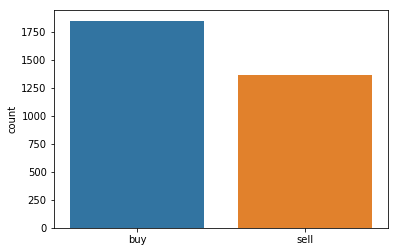

In [19]:
sns.countplot([x.to_label() for x in positions])

### Build model

In [20]:
batch_size = 128
epochs = 150

In [21]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.losses import mean_squared_error, categorical_crossentropy
from keras.optimizers import Adam
from keras import metrics

Using TensorFlow backend.


In [22]:
model = Sequential()
model.add(Conv1D(32,  3, activation='relu', padding='same', input_shape=X[0].shape))
model.add(Conv1D(64,  4, activation='relu', padding='same'))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(Conv1D(256, 6, activation='relu', padding='same'))

In [ ]:
model.add(Flatten())

for i in range(6,0,-1):
    model.add(Dense(i*64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

model.add(Dense(y.shape[1]))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=[metrics.mae, metrics.categorical_accuracy])

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=3)
print("Accuracy: %.2f%%" % (scores[2]*100))

Train on 2571 samples, validate on 643 samples
Epoch 1/150
2571/2571 [==============================] - 6s - loss: 0.7087 - mean_absolute_error: 0.4949 - categorical_accuracy: 0.5438 - val_loss: 0.6790 - val_mean_absolute_error: 0.4916 - val_categorical_accuracy: 0.5739
Epoch 2/150
2571/2571 [==============================] - 1s - loss: 0.6240 - mean_absolute_error: 0.4343 - categorical_accuracy: 0.5694 - val_loss: 0.5852 - val_mean_absolute_error: 0.4253 - val_categorical_accuracy: 0.5739
Epoch 3/150
2571/2571 [==============================] - 1s - loss: 0.5298 - mean_absolute_error: 0.3678 - categorical_accuracy: 0.6332 - val_loss: 0.4615 - val_mean_absolute_error: 0.3360 - val_categorical_accuracy: 0.8631
Epoch 4/150
2571/2571 [==============================] - 1s - loss: 0.4580 - mean_absolute_error: 0.3133 - categorical_accuracy: 0.8226 - val_loss: 0.4326 - val_mean_absolute_error: 0.3173 - val_categorical_accuracy: 0.8631
Epoch 5/150
2571/2571 [==============================] - 

2571/2571 [==============================] - 1s - loss: 0.0237 - mean_absolute_error: 0.0114 - categorical_accuracy: 0.9918 - val_loss: 0.3588 - val_mean_absolute_error: 0.0921 - val_categorical_accuracy: 0.9067
Epoch 38/150
2571/2571 [==============================] - 1s - loss: 0.0129 - mean_absolute_error: 0.0068 - categorical_accuracy: 0.9965 - val_loss: 0.4071 - val_mean_absolute_error: 0.0798 - val_categorical_accuracy: 0.9253
Epoch 39/150
2571/2571 [==============================] - 1s - loss: 0.0169 - mean_absolute_error: 0.0075 - categorical_accuracy: 0.9961 - val_loss: 0.4677 - val_mean_absolute_error: 0.0915 - val_categorical_accuracy: 0.9098
Epoch 40/150
2571/2571 [==============================] - 1s - loss: 0.0244 - mean_absolute_error: 0.0117 - categorical_accuracy: 0.9911 - val_loss: 0.3506 - val_mean_absolute_error: 0.0795 - val_categorical_accuracy: 0.9253
Epoch 41/150
2571/2571 [==============================] - 1s - loss: 0.0297 - mean_absolute_error: 0.0114 - categ

2571/2571 [==============================] - 1s - loss: 1.3787e-04 - mean_absolute_error: 1.3395e-04 - categorical_accuracy: 1.0000 - val_loss: 0.7157 - val_mean_absolute_error: 0.0749 - val_categorical_accuracy: 0.9253
Epoch 74/150
2571/2571 [==============================] - 1s - loss: 0.0398 - mean_absolute_error: 0.0076 - categorical_accuracy: 0.9926 - val_loss: 0.6661 - val_mean_absolute_error: 0.0902 - val_categorical_accuracy: 0.9114
Epoch 75/150
2571/2571 [==============================] - 1s - loss: 0.0420 - mean_absolute_error: 0.0194 - categorical_accuracy: 0.9864 - val_loss: 0.3191 - val_mean_absolute_error: 0.0895 - val_categorical_accuracy: 0.9098
Epoch 76/150
2571/2571 [==============================] - 1s - loss: 0.0260 - mean_absolute_error: 0.0112 - categorical_accuracy: 0.9942 - val_loss: 0.4596 - val_mean_absolute_error: 0.0884 - val_categorical_accuracy: 0.9160
Epoch 77/150
2571/2571 [==============================] - 1s - loss: 0.0186 - mean_absolute_error: 0.0084

2571/2571 [==============================] - 1s - loss: 8.5553e-04 - mean_absolute_error: 6.8620e-04 - categorical_accuracy: 0.9996 - val_loss: 0.6047 - val_mean_absolute_error: 0.0780 - val_categorical_accuracy: 0.9253
Epoch 110/150
2571/2571 [==============================] - 1s - loss: 0.0065 - mean_absolute_error: 5.9501e-04 - categorical_accuracy: 0.9996 - val_loss: 0.6075 - val_mean_absolute_error: 0.0768 - val_categorical_accuracy: 0.9253
Epoch 111/150
2571/2571 [==============================] - 1s - loss: 7.3734e-04 - mean_absolute_error: 6.1583e-04 - categorical_accuracy: 0.9996 - val_loss: 0.6159 - val_mean_absolute_error: 0.0783 - val_categorical_accuracy: 0.9191
Epoch 112/150
2571/2571 [==============================] - 1s - loss: 6.1567e-04 - mean_absolute_error: 5.0234e-04 - categorical_accuracy: 0.9996 - val_loss: 0.6596 - val_mean_absolute_error: 0.0816 - val_categorical_accuracy: 0.9191
Epoch 113/150
2571/2571 [==============================] - 1s - loss: 2.8144e-04 -

2571/2571 [==============================] - 1s - loss: 0.0315 - mean_absolute_error: 0.0149 - categorical_accuracy: 0.9914 - val_loss: 0.3771 - val_mean_absolute_error: 0.0862 - val_categorical_accuracy: 0.9238
Epoch 145/150
2571/2571 [==============================] - 1s - loss: 0.0095 - mean_absolute_error: 0.0072 - categorical_accuracy: 0.9977 - val_loss: 0.5095 - val_mean_absolute_error: 0.0765 - val_categorical_accuracy: 0.9316
Epoch 146/150
2571/2571 [==============================] - 1s - loss: 0.0033 - mean_absolute_error: 0.0026 - categorical_accuracy: 0.9988 - val_loss: 0.5523 - val_mean_absolute_error: 0.0695 - val_categorical_accuracy: 0.9347
Epoch 147/150
2571/2571 [==============================] - 1s - loss: 0.0018 - mean_absolute_error: 0.0014 - categorical_accuracy: 0.9992 - val_loss: 0.5932 - val_mean_absolute_error: 0.0684 - val_categorical_accuracy: 0.9347
Epoch 148/150
 896/2571 [=========>....................] - ETA: 1s - loss: 7.8406e-04 - mean_absolute_error: 7

In [ ]:
predicted = model.predict(X_test, batch_size=32)

In [ ]:
predicted = predicted.argmax(axis=1)

In [ ]:
y_test = y_test.argmax(axis=1)

In [ ]:
confusion_matrix(y_test, predicted)

In [ ]:
print(classification_report(y_test, predicted))